# Logistic Regression

In [4]:
import os
import sys

#home=os.path.expanduser("~") # HOME이 설정되어 있지 않으면 expanduser('~')를 사용한다.
#osn.environ["PYSPARK_PYTHON"] = "/usr/bin/python"
os.environ["SPARK_HOME"]=os.path.join(os.path.expanduser("~"),r"C:\Users\user\spark-2.0.0-bin-hadoop2.7\spark-2.0.0-bin-hadoop2.7")
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [5]:
import pyspark
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config("spark.sql.warehouse.dir", r"C:\Users\user\MyStudySpace\2019-2\BigData_Spark\src")\
    .getOrCreate()

## 로그
0을 포함해서 음수 x에 대해 log(x)는 무한값 또는 계산할 수 없다

In [6]:
import numpy as np
print "log of x= 0:", np.log(1)
print "log 0: ",np.log(0)
print "log negative: ",np.log(-1)

log of x= 0: 0.0
log 0:  -inf
log negative:  nan


C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


## Logit
로짓함수는 승수에 e밑으로 자연로그를 취해서 log odds구한다
sigmoid는 x=0일 경우, 0.5 값이 된다.

In [7]:
np.exp?

In [9]:
sigmoid=lambda(x):1.0/(1+np.exp(-x))
print "logit -100: {0:.3f}".format(sigmoid(-100))
print "sigmoid of x=-1:", sigmoid(-1)
print "logit    0: {0:.3f}".format(sigmoid(0))
print "sigmoid of x= 1:", sigmoid(1)
print "logit  100: {0:.3f}".format(sigmoid(100))
print sigmoid(0)

logit -100: 0.000
sigmoid of x=-1: 0.2689414213699951
logit    0: 0.500
sigmoid of x= 1: 0.7310585786300049
logit  100: 1.000
0.5


## 승수
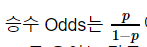

In [8]:
odds=lambda(x):x/(1-x)
print "odds 0: {0:.3f}".format(odds(0))
print "odds 1/6: {0:.3f}".format(odds(1/6.))
print "odds 0.5: {0:.3f}".format(odds(0.5))

odds 0: 0.000
odds 1/6: 0.200
odds 0.5: 1.000


sigmoid함수는 0일 때 0.5이고, 이을 기준으로 'S'자 곡선을 보여줌

In [10]:
x=np.arange(-5,5,0.05)
#x=np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,
#            3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
print x[:5]

[-5.   -4.95 -4.9  -4.85 -4.8 ]


C:\Users\user\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


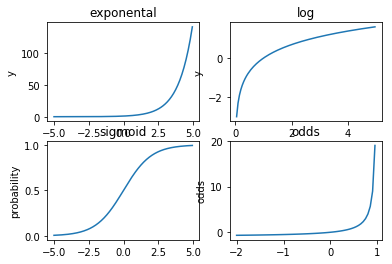

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()

ax221=fig.add_subplot(221)
ax221.set_title('exponental')
exp=np.exp(x)
ax221.plot(x,exp,'-')
ax221.set_ylabel('y')

ax222=fig.add_subplot(222)
ax222.set_title('log')
log=np.log(x)
ax222.plot(x,log,'-')
ax222.set_ylabel('y')

ax223=fig.add_subplot(223)
ax223.set_title('sigmoid')
sigmoid=lambda(x):1.0/(1+np.exp(-x))
sig=sigmoid(x)
ax223.plot(x,sig,'-')
ax223.set_ylabel('probability')


ax224=fig.add_subplot(224)
ax224.set_title('odds')
x=np.arange(-2,1,0.05)  # when x=1, division by zero
odds=lambda(x):x/(1-x)
odd=odds(x)
ax224.plot(x,odd,'-')
ax224.set_ylabel('odds')

plt.show()

# 로지스틱 회귀
## 확률
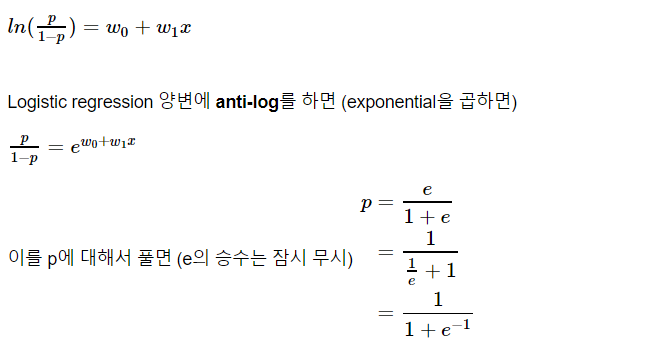

### 데이터 읽기

In [15]:
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
x=np.array([0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50])
y=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1])
#y=np.array([0,0,0,0,0,0,100,0,100,0,100,0,100,0,100,100,100,100,100,100])
#x=np.array([23663, 20659, 32277, 21595, 27227, 25023, 26504, 28741, 21735,23366, 20871, 28370, 21105, 22706, 19527, 28321])
#y=np.array([    0,     0,     1,     0,     1,     0,     1,     1,     0,0,     0,     1,     0,     1,     1,     1])

#x=np.array([ 0.24,  0.25,  0.28,  0.30,  0.33,  0.35,  0.36,  0.36,  0.36,  0.36,  0.40,  0.40,
#   0.41,  0.42,  0.43,  0.47,  0.51,  0.53,  0.56,  0.57,  0.59,  0.64,  0.66,  0.82,
#   0.85,  0.94,  1.04,  1.04])
#y=np.array([ 0.00,  0.00,  1.00,  1.00,  1.00,  1.00,  0.00,  1.00,  0.00,  1.00,  0.00,  1.00,
#  0.00,  1.00,  0.00,  1.00,  1.00,  1.00,  0.00,  0.00,  1.00,  1.00,  1.00,  1.00,
#  1.00,  1.00,  1.00,  1.00])

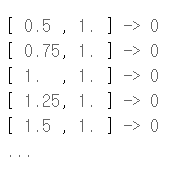

In [16]:
print x[:5], x.shape

[0.5  0.75 1.   1.25 1.5 ] (20L,)


In [17]:
x=np.array([x,np.ones(x.shape[0])])

In [18]:
x=x.T
x.shape

(20L, 2L)

In [19]:
print x

[[0.5  1.  ]
 [0.75 1.  ]
 [1.   1.  ]
 [1.25 1.  ]
 [1.5  1.  ]
 [1.75 1.  ]
 [1.75 1.  ]
 [2.   1.  ]
 [2.25 1.  ]
 [2.5  1.  ]
 [2.75 1.  ]
 [3.   1.  ]
 [3.25 1.  ]
 [3.5  1.  ]
 [4.   1.  ]
 [4.25 1.  ]
 [4.5  1.  ]
 [4.75 1.  ]
 [5.   1.  ]
 [5.5  1.  ]]


## 로지스틱 모델링
종속변수 y를 먼저 그리고 x는 절편 값이 기본으로 빠져 있으므로 필요하면 직접 추가해 주어야 한다. statsmodels.tools.add_constant()를 사용하거나 위와 같이 추가할 수 있다.

In [22]:
import statsmodels.api as sm
logit = sm.Logit(y,x)
result = logit.fit()
w1,w0=result.params
print w1,w0

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7
1.504645428373334 -4.077713431087632


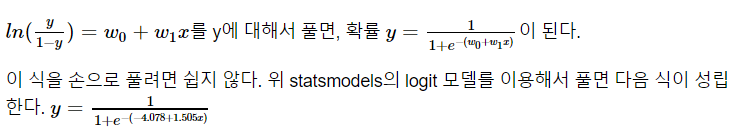

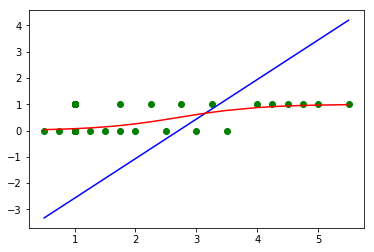

In [23]:
#위에서 구한 w1,w0을 대입해서 그래프로 그려보기
import matplotlib.pyplot as plt

plt.plot(x, y, 'go')
plt.plot(x,w0+w1*x,'b-')
plt.plot(x,1/(1+np.exp(-(w0+w1*x))),'r-')
plt.show()

녹색 점이 실제데이터
파란선 회귀식
빨간선은 로지스틱 함수(시그모이드 곡선으로 회귀)

## Gradient
### Cost
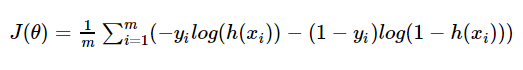

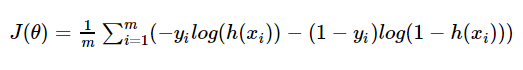

위 식을 하나로 합친 식

weight = weights - 학습률*gradient


In [41]:
# x, y 정의
# x1은 실제 데이터의 상수가 들어있는 두개의 컬럼 벡터 (2차원)
# y1은 0과 1로 이루어진 그냥 벡터 (1차원)
# y도 2차원으로 바꾸어줘야 함.
x1=x
y1=y
x1.shape, y1.shape

((20L, 2L), (20L,))

### h(x)함수
sigmoid 함수

h함수
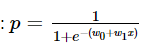

In [25]:
def sigmoid(x):
    import numpy as np
    return 1.0/(1+np.exp(-x))

In [26]:
def h(x,theta):
    z=np.dot(x,theta)
    return sigmoid(z)

### weights
컬럼갯수만큼 만들어주고 x데이터와의 연산을 위해 shape을 맞추어 주어야 함.

weights=np.ones([x.shape[0],1])

In [27]:
weights=np.ones([x1.shape[1],1])
print weights,weights.shape
# 첫번째 출력값은 2차원으로 만들어줌

[[1.]
 [1.]] (2L, 1L)


In [28]:
# 앞서 만든 weights를 사용해 h(x)를 계산
h(x1[:5],weights)

array([[0.81757448],
       [0.8519528 ],
       [0.88079708],
       [0.90465054],
       [0.92414182]])

### gradient 계산

#### cost function
cost function은 h-y
전체 평균을 계산 (아래 식으로)

total_cost = -(1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))

In [42]:
y1=y1[:,np.newaxis]
y1.shape

(20L, 1L)

In [43]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [44]:
loss(h(x1,weights),y1)

1.4373882978982158

In [45]:
h(x1,weights).shape, x1.shape,y1.shape

((20L, 1L), (20L, 2L), (20L, 1L))

In [46]:
# 에러 = 예측값 - 실제값
error=h(x1,weights)-y1
print error.shape

(20L, 1L)


기울기 Gradient는 오류에 x.T를 계산해야 한다. x의 transpose를 계산해야 하는 이유는, gradient는 x 컬럼 갯수만큼 결과가 산출되어야 하기 때문이다.

In [47]:
np.dot(x1.T,error)

array([[16.42888382],
       [ 9.05573467]])

In [48]:
def gradientDescent(x, h, y):
    return np.dot(x.T, (h-y)) / y.shape[0]

In [49]:
gradientDescent(x1,h(x1,weights),y1)

array([[0.82144419],
       [0.45278673]])

### update
weights에서 gradient를 하강하면서, 즉 weights−α×gradient가 수렴할 때까지 반복

In [52]:
iter=10000
alpha=0.01
#m=X.shape[0]
#####weights=np.ones([x1.shape[1]])
weights=np.ones([x1.shape[1],1])
print x1.shape[1]
print weights
#theta=np.array([1,1],dtype=float)
for i in range(iter):
    #predicted
    _h=h(x1,weights)
    #error
    error=_h-y1
    #gradient=np.dot(x1.T, error) / y1.shape[0]
    gradient=np.dot(x1.T, error)
    #update
    weights-=alpha*gradient
    if i%1000==0:
        print "{0} theta:{1}".format(i,weights)
print weights

2
[[1.]
 [1.]]
0 theta:[[0.83571116]
 [0.90944265]]
1000 theta:[[ 1.46445514]
 [-3.95885309]]
2000 theta:[[ 1.50248787]
 [-4.07133946]]
3000 theta:[[ 1.50452706]
 [-4.07736375]]
4000 theta:[[ 1.50463893]
 [-4.07769422]]
5000 theta:[[ 1.50464507]
 [-4.07771238]]
6000 theta:[[ 1.50464541]
 [-4.07771337]]
7000 theta:[[ 1.50464543]
 [-4.07771343]]
8000 theta:[[ 1.50464543]
 [-4.07771343]]
9000 theta:[[ 1.50464543]
 [-4.07771343]]
[[ 1.50464543]
 [-4.07771343]]


## 문제: 입학

UCLA대학에서 제공되는 데이터를 분석해보자. admit은 종속변수로, 합격/불합격을 나타내는 이진적 값을 가진다. 나머지 변수는 독립변수로 GRE (Graduate Record Exam scores), GPA (grade point average), rank는 학부의 평판을 나타낸댜. GRE, GPA는 연속변수이고 rank는 학부평판으로 1이면 최상 4이면 최하의 평판을 의미한다.

### 데이터 읽기

In [53]:
import pandas as pd
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [54]:
# 동일한 명칭의 함수가 DataFrame에 있기 때문에 'prestige'로 변경
df.columns = ["admit", "gre", "gpa", "prestige"]

In [55]:
print df.describe()

            admit         gre         gpa   prestige
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


In [56]:
# 교차빈도 구하기
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


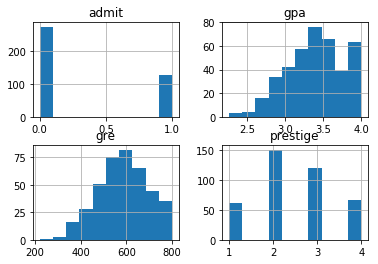

In [58]:
%matplotlib inline
import pylab as pl
df.hist()
pl.show()

### 모델링
pasty를 이용해 모델링을 완성

DesignMatrics 첫째 인자는

admit ~ gre + gpa + C(prestige)
두번째 인자는 데이터 df, return_type을 정해 줄 수 있다. pandas DataFrame 또는 numpy record array로 저장할 수 있다. prestige는 category 변수로 만들어 모델을 만들어 준다.

반환 값은 종속변수와 독립변수인 y, X를 돌려준다.

In [61]:
from patsy import dmatrices
y, X = dmatrices('admit ~ gre + gpa + C(prestige)', df, return_type = 'dataframe')
print y

     admit
0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
5      1.0
6      1.0
7      0.0
8      1.0
9      0.0
10     0.0
11     0.0
12     1.0
13     0.0
14     1.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     0.0
21     1.0
22     0.0
23     0.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     0.0
..     ...
370    1.0
371    1.0
372    1.0
373    1.0
374    0.0
375    0.0
376    0.0
377    1.0
378    0.0
379    0.0
380    0.0
381    1.0
382    0.0
383    0.0
384    1.0
385    0.0
386    1.0
387    0.0
388    0.0
389    0.0
390    1.0
391    1.0
392    1.0
393    1.0
394    1.0
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0

[400 rows x 1 columns]


In [60]:
X.head()

,Intercept,C(prestige)[T.2L],C(prestige)[T.3L],C(prestige)[T.4L],gre,gpa
0,1.0,0.0,1.0,0.0,380.0,3.61
1,1.0,0.0,1.0,0.0,660.0,3.67
2,1.0,0.0,0.0,0.0,800.0,4.00
3,1.0,0.0,0.0,1.0,640.0,3.19
4,1.0,0.0,0.0,1.0,520.0,2.93


### statsmodel

In [62]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y,X)
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 17 Dec 2019   Pseudo R-squ.:                 0.08292
Time:                        13:40:33   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(presti

In [42]:
# weights와 conf_int 신뢰구간을 출력
print result.params

print result.conf_int()

Intercept           -3.989979
C(prestige)[T.2L]   -0.675443
C(prestige)[T.3L]   -1.340204
C(prestige)[T.4L]   -1.551464
gre                  0.002264
gpa                  0.804038
dtype: float64
                          0         1
Intercept         -6.224242 -1.755716
C(prestige)[T.2L] -1.295751 -0.055135
C(prestige)[T.3L] -2.016992 -0.663416
C(prestige)[T.4L] -2.370399 -0.732529
gre                0.000120  0.004409
gpa                0.153684  1.454391


### sklearn
순서대로 절편과 prestige, gre, gpa에 대한 가중치가 출력되고 있으며 statsmodel의 결과와 비교해 보자. statsmodel과 그 결과에 약간의 차이가 있다.

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X, y)
model.coef_

C:\Users\user\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-3.97765654e+00, -6.74567838e-01, -1.33708167e+00,
        -1.55029740e+00,  2.25513644e-03,  8.01765502e-01]])

## 문제: 성별
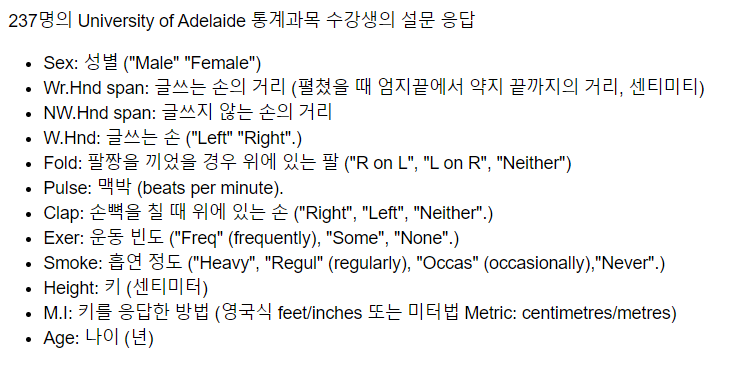

In [65]:
#taken from pystat from this below
import statsmodels.api as sm
mass=sm.datasets.get_rdataset("survey","MASS")

In [66]:
mass.data.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [67]:
type(mass.data)

pandas.core.frame.DataFrame

In [68]:
mass.data.columns

Index([u'Sex', u'Wr.Hnd', u'NW.Hnd', u'W.Hnd', u'Fold', u'Pulse', u'Clap',
       u'Exer', u'Smoke', u'Height', u'M.I', u'Age'],
      dtype='object')

In [69]:
mass.data.columns=['sex','wr','nw','w','fold','pulse','clap','exer','smoke','height','mi','age']


In [70]:
mass.data.columns

Index([u'sex', u'wr', u'nw', u'w', u'fold', u'pulse', u'clap', u'exer',
       u'smoke', u'height', u'mi', u'age'],
      dtype='object')

In [71]:
mass.data.groupby('sex').mean()

,wr,nw,pulse,height,age
sex,,,,,
Female,17.595763,17.45678,75.126316,165.686667,20.407534
Male,19.741880,19.71453,73.197917,178.826038,20.331958


In [72]:
mass.data.groupby('sex').count()

,wr,nw,w,fold,pulse,clap,exer,smoke,height,mi,age
sex,,,,,,,,,,,
Female,118,118,117,118,95,118,118,118,102,102,118
Male,117,117,118,118,96,117,118,117,106,106,118


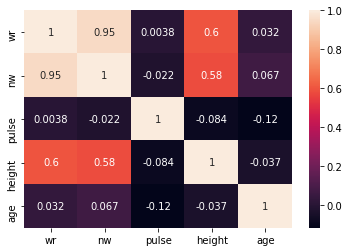

In [74]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
corr= mass.data.corr()
sns.heatmap(corr, annot=True)
plt.show()

### 로지스틱 모델

In [75]:
formula='sex ~ wr+nw+w+pulse+height+age'
import statsmodels.formula.api as smf
model=smf.glm(formula,data=mass.data,family=sm.families.Binomial()).fit()

In [76]:
print (model.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['sex[Female]', 'sex[Male]']   No. Observations:                  168
Model:                                      GLM   Df Residuals:                      161
Model Family:                          Binomial   Df Model:                            6
Link Function:                            logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -52.236
Date:                          Tue, 17 Dec 2019   Deviance:                       104.47
Time:                                  13:58:39   Pearson chi2:                     646.
No. Iterations:                               6                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

In [77]:
formula2='sex ~ nw+height'
model2=smf.glm(formula2,data=mass.data,family=sm.families.Binomial()).fit()
print (model2.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     ['sex[Female]', 'sex[Male]']   No. Observations:                  207
Model:                                      GLM   Df Residuals:                      204
Model Family:                          Binomial   Df Model:                            2
Link Function:                            logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -67.329
Date:                          Tue, 17 Dec 2019   Deviance:                       134.66
Time:                                  13:59:00   Pearson chi2:                     468.
No. Iterations:                               6                                         
Covariance Type:                      nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------

## 문제: Titanic case

1912년 4월 15일 Titanic 유람선 사고의 탑승객 2224명의 승객 및 선원 가운데 1502명이 사망했다. 사고 당시의 탑승객 위치, 상황 등 관련 데이터를 분석하여 생존 여부를 예측하자. 출처: Kaggle

### 데이터 받기

In [59]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7CEE-EB99

 C:\Users\user\MyStudySpace\2019-2\BigData_Spark\src 디렉터리

2019-11-26  오후 05:11    <DIR>          .
2019-11-26  오후 05:11    <DIR>          ..
2019-11-26  오후 03:09    <DIR>          .ipynb_checkpoints
2019-10-31  오후 07:54            30,845 191029_Assignment.ipynb
2019-10-29  오후 05:15            94,642 201710776Test.ipynb
2019-11-26  오후 05:20    <DIR>          data
2019-10-22  오후 01:53            58,961 ds3_sparkRDD.ipynb
2019-10-22  오후 02:45            29,832 ds4_sparkDF.ipynb
2019-11-12  오후 04:27           116,996 ds5_sparkTran.ipynb
2019-11-19  오후 05:49         1,207,870 ds7_regression.ipynb
2019-11-26  오후 05:11           274,870 ds9_LogisticRegression.ipynb
2019-10-15  오후 07:37             5,132 spark_df.ipynb
2019-10-21  오후 06:04             1,877 Start_Spark.ipynb
2019-10-22  오후 01:35    <DIR>          sub
               9개 파일           1,821,025 바이트
               5개 디렉터리  18,652,282,880 바이트 남음


In [63]:
!dir "data/kaggle/titanic/"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7CEE-EB99

 C:\Users\user\MyStudySpace\2019-2\BigData_Spark\src\data\kaggle\titanic 디렉터리

2019-11-26  오후 05:20    <DIR>          .
2019-11-26  오후 05:20    <DIR>          ..
2018-04-09  오전 05:33            28,629 test.csv
2018-04-09  오전 05:33            61,194 train.csv
               2개 파일              89,823 바이트
               2개 디렉터리  18,651,701,248 바이트 남음


### 파일 읽기

In [80]:
import os
_trainDf = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true')\
    .load(os.path.join("data","kaggle","titanic","train.csv"))

In [81]:
_trainDf.show(3, truncate=True)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|     |       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|     |       S|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
only showing top 3 rows



In [82]:
_testDf = spark.read.format('com.databricks.spark.csv')\
    .options(header='true', inferschema='true')\
    .load(os.path.join("data","kaggle","titanic","test.csv"))

In [83]:
_testDf.show(3, truncate=True)

+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|
+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
|        892|     3|    Kelly, Mr. James|  male|34.5|    0|    0|330911|7.8292|     |       Q|
|        893|     3|Wilkes, Mrs. Jame...|female|47.0|    1|    0|363272|   7.0|     |       S|
|        894|     2|Myles, Mr. Thomas...|  male|62.0|    0|    0|240276|9.6875|     |       Q|
+-----------+------+--------------------+------+----+-----+-----+------+------+-----+--------+
only showing top 3 rows



### train, test 파일 합치기

In [84]:
# 새로운 컬럼 생성
from pyspark.sql.functions import lit, col
_trainDf = _trainDf.withColumn('testOrtrain',lit('train'))
_testDf = _testDf.withColumn('testOrtrain',lit('test'))

In [85]:
_testDf = _testDf.withColumn('Survived',lit(99))

In [86]:
_trainDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)



In [87]:
_testDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- Survived: integer (nullable = false)



두 DataFrame을 서로 합치려면 union 기능을 사용한다. 
두 DataFrame의 컬럼 수와 데이터타잎이 일치해야 한다. 순서가 다르더라도 그냥 합치는 것에 주의한다. 단 주의해야 할 점은, Sql의 union은 컬럼명을 고려하지 않고 컬럼수만 동일하면 합쳐준다.

In [88]:
# 합치려면 union
df=_trainDf.select('PassengerId','Survived','Pclass','Name','Sex','Age',\
                   'SibSp','Parch','Ticket','Fare','Cabin','Embarked','testOrtrain')\
            .union(_testDf.select('PassengerId','Survived','Pclass','Name','Sex','Age',\
                   'SibSp','Parch','Ticket','Fare','Cabin','Embarked','testOrtrain'))

In [89]:
df.select('testOrtrain','Survived','Name')\
    .filter(df['testOrtrain']=='test').show(10)

+-----------+--------+--------------------+
|testOrtrain|Survived|                Name|
+-----------+--------+--------------------+
|       test|      99|    Kelly, Mr. James|
|       test|      99|Wilkes, Mrs. Jame...|
|       test|      99|Myles, Mr. Thomas...|
|       test|      99|    Wirz, Mr. Albert|
|       test|      99|Hirvonen, Mrs. Al...|
|       test|      99|Svensson, Mr. Joh...|
|       test|      99|Connolly, Miss. Kate|
|       test|      99|Caldwell, Mr. Alb...|
|       test|      99|Abrahim, Mrs. Jos...|
|       test|      99|Davies, Mr. John ...|
+-----------+--------+--------------------+
only showing top 10 rows



In [75]:
df.groupBy(df.testOrtrain).count().show()

+-----------+-----+
|testOrtrain|count|
+-----------+-----+
|      train|  891|
|       test|  418|
+-----------+-----+



### 미싱데이터 처리

In [90]:
# alias = rename
from pyspark.sql.functions import count
df.agg(*[count(c).alias(c) for c in df.columns]).show()

+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+
|PassengerId|Survived|Pclass|Name| Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+
|       1309|    1309|  1309|1309|1309|1046| 1309| 1309|  1309|1308| 1309|    1309|       1309|
+-----------+--------+------+----+----+----+-----+-----+------+----+-----+--------+-----------+



In [91]:
# 결측값 확인 함수
def countNull(df,var):
    return df.where(df[var].isNull()).count()

missing = {c: countNull(df,c) for c in ['Survived','Age','SibSp','Parch','Fare']}

print missing

{'Fare': 1, 'Age': 263, 'SibSp': 0, 'Survived': 0, 'Parch': 0}


In [92]:
print df.filter("Age is NULL").show(5)

+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+-----------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|Ticket|  Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+--------------------+------+----+-----+-----+------+------+-----+--------+-----------+
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|330877|8.4583|     |       Q|      train|
|         18|       1|     2|Williams, Mr. Cha...|  male|null|    0|    0|244373|  13.0|     |       S|      train|
|         20|       1|     3|Masselmani, Mrs. ...|female|null|    0|    0|  2649| 7.225|     |       C|      train|
|         27|       0|     3|Emir, Mr. Farred ...|  male|null|    0|    0|  2631| 7.225|     |       C|      train|
|         29|       1|     3|"O'Dwyer, Miss. E...|female|null|    0|    0|330959|7.8792|     |       Q|      train|
+-----------+--------+------+--------------------+------+----+-----+----

In [93]:
print df.filter("Fare is NULL").show(5)

+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+-----------+
|PassengerId|Survived|Pclass|              Name| Sex| Age|SibSp|Parch|Ticket|Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+-----------+
|       1044|      99|     3|Storey, Mr. Thomas|male|60.5|    0|    0|  3701|null|     |       S|       test|
+-----------+--------+------+------------------+----+----+-----+-----+------+----+-----+--------+-----------+

None


NULL값은 결측으로 제외하거나 또는 평균으로 대체하거나 한다. 퍙균을 계산하기 위해, pyspark.sql.functions의 함수 가운데 avg()를 사용한다. collect()의 결과는 Python List이므로, 반환 값의 index '0'으로 평균값을 구할 수 있다.

In [94]:
from pyspark.sql import functions as F

avgAge=df.agg(F.avg(df['Age']).alias('meanAge')).collect()
avgFare=df.agg(F.avg(df['Fare']).alias('meanFare')).collect()

print avgAge[0]['meanAge']
print avgFare[0]['meanFare']

29.8811376673
33.2954792813


In [99]:
# 그룹바이 후 평균 구하기
print df.groupBy().mean('Age').first()
print df.groupBy().mean('Fare').first()

Row(avg(Age)=29.881137667304014)
Row(avg(Fare)=33.29547928134553)


In [100]:
df.describe(['Age']).show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|              1046|
|   mean|29.881137667304014|
| stddev| 14.41349321127132|
|    min|              0.17|
|    max|              80.0|
+-------+------------------+



In [101]:
# 필터 사용
my = spark.createDataFrame([[2019], [2020], [2021], [None]], ['year'])
my = my.fillna({'year':'9999'})
my.show()

+----+
|year|
+----+
|2019|
|2020|
|2021|
|9999|
+----+



In [102]:
from pyspark.sql.functions import when,isnull
df=df.withColumn("Age", when(isnull(df['Age']), avgAge[0]['meanAge']).otherwise(df.Age))
df=df.withColumn("Fare", when(isnull(df['Fare']), avgFare[0]['meanFare']).otherwise(df.Fare))
#df.show(10)

### outlier
approxQuantile(변수명, 분기비율, 상대오류)는 outlier가 있는지 확인할 수 있다.

In [103]:
quantiles=df.stat.approxQuantile('Age', [0.25,0.75], 0.0 )
print quantiles

[22.0, 35.0]


In [104]:
mid50 = quantiles[1]-quantiles[0]
lower = quantiles[0] - 1.15*mid50
upper = quantiles[1] + 2.0*mid50
print lower, upper

7.05 61.0


In [105]:
df.filter((df.Age<lower) | (df.Age>upper)).show(3,truncate=True)

+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch| Ticket|  Fare|Cabin|Embarked|testOrtrain|
+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
|          8|       0|     3|Palsson, Master. ...|  male|2.0|    3|    1| 349909|21.075|     |       S|      train|
|         11|       1|     3|Sandstrom, Miss. ...|female|4.0|    1|    1|PP 9549|  16.7|   G6|       S|      train|
|         17|       0|     3|Rice, Master. Eugene|  male|2.0|    4|    1| 382652|29.125|     |       Q|      train|
+-----------+--------+------+--------------------+------+---+-----+-----+-------+------+-----+--------+-----------+
only showing top 3 rows



In [106]:
df.groupBy('Sex').count().show()

+------+-----+
|   Sex|count|
+------+-----+
|female|  466|
|  male|  843|
+------+-----+



이름으로부터 패턴을 찾아 성별을 구분

In [90]:
import re
def getTitle(name):
    title=None
    if re.search(".*Mr\..*", name):
        title="male"
    elif re.search(".*[Miss|Mrs|Ms]\..*", name):
        title="female"
    return title

In [91]:
names=["Braund, Mr. Owen Harris",
       "Cumings, Mrs. John Bradley (Florence Briggs Thayer)",
       "Heikkinen, Miss. Laina",
       "Ms.hello",
       "No title"]
for n in names:
    print getTitle(n)

male
female
female
female
None


In [92]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

getTitleUdf = udf(getTitle, StringType())
df = df.withColumn('Title', getTitleUdf(df['Name']))

In [93]:
 df.select('testOrtrain','Name','Title','Sex')\
    .filter(df['testOrtrain']=='test')\
    .show(10,truncate=False)

+-----------+--------------------------------------------+------+------+
|testOrtrain|Name                                        |Title |Sex   |
+-----------+--------------------------------------------+------+------+
|test       |Kelly, Mr. James                            |male  |male  |
|test       |Wilkes, Mrs. James (Ellen Needs)            |female|female|
|test       |Myles, Mr. Thomas Francis                   |male  |male  |
|test       |Wirz, Mr. Albert                            |male  |male  |
|test       |Hirvonen, Mrs. Alexander (Helga E Lindqvist)|female|female|
|test       |Svensson, Mr. Johan Cervin                  |male  |male  |
|test       |Connolly, Miss. Kate                        |female|female|
|test       |Caldwell, Mr. Albert Francis                |male  |male  |
|test       |Abrahim, Mrs. Joseph (Sophie Halaut Easu)   |female|female|
|test       |Davies, Mr. John Samuel                     |male  |male  |
+-----------+--------------------------------------

In [94]:
df.groupBy('Title').count().show()
df.groupBy('Sex').count().show()

+------+-----+
| Title|count|
+------+-----+
|  null|   19|
|female|  533|
|  male|  757|
+------+-----+

+------+-----+
|   Sex|count|
+------+-----+
|female|  466|
|  male|  843|
+------+-----+



In [95]:
df.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- Title: string (nullable = true)



### label, features

In [107]:
# cast로 형변환
df=df.withColumn("SurvivedD",_trainDf['Survived']\
    .cast("double"))\
    .drop('Survived')

In [108]:
df.groupBy('SurvivedD').count().show()

+---------+-----+
|SurvivedD|count|
+---------+-----+
|      0.0|  549|
|      1.0|  342|
|     99.0|  418|
+---------+-----+



In [109]:
df.show(5, truncate=True)

+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------+---------+
|PassengerId|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|testOrtrain|SurvivedD|
+-----------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+-----------+---------+
|          1|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25|     |       S|      train|      0.0|
|          2|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|      train|      1.0|
|          3|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925|     |       S|      train|      1.0|
|          4|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|      train|      1.0|
|          5|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05|     |       S

In [110]:
# StringIndexer로 변환
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
#from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

SexIndexer = StringIndexer(inputCol="Sex", outputCol="SexI")
EmbarkedIndexer = StringIndexer(inputCol="Embarked", outputCol="EmbarkedI")

#PclassIndexer = StringIndexer(inputCol="Pclass", outputCol="SexI")


In [111]:
# features 컬럼을 만들어 준다.
va = VectorAssembler(inputCols=["Pclass","SexI","Age","SibSp","Parch",\
                                "Fare","EmbarkedI"],\
                     outputCol="features")
#pipeline = Pipeline(stages=[PclassIndexer,SexIndexer,ParchIndexer,\
#                            FareIndexer,EmbarkedIndexer,va])

In [112]:
# pipeline으로 구성해서 fit() 을 실행
pipeline = Pipeline(stages=[SexIndexer,EmbarkedIndexer,va])
model = pipeline.fit(df)

### train, test

In [113]:
myDf = model.transform(df)

In [114]:
myDf.select('SurvivedD','features').show(10)

+---------+--------------------+
|SurvivedD|            features|
+---------+--------------------+
|      0.0|[3.0,0.0,22.0,1.0...|
|      1.0|[1.0,1.0,38.0,1.0...|
|      1.0|[3.0,1.0,26.0,0.0...|
|      1.0|[1.0,1.0,35.0,1.0...|
|      0.0|(7,[0,2,5],[3.0,3...|
|      0.0|[3.0,0.0,29.88113...|
|      0.0|(7,[0,2,5],[1.0,5...|
|      0.0|[3.0,0.0,2.0,3.0,...|
|      1.0|[3.0,1.0,27.0,0.0...|
|      1.0|[2.0,1.0,14.0,1.0...|
+---------+--------------------+
only showing top 10 rows



In [115]:
print "all num of rows: ",myDf.count()

all num of rows:  1309


In [116]:
train=myDf.filter(myDf['testOrtrain']=='train')
testDf=myDf.filter(myDf['testOrtrain']=='test')

train.count()

891

In [117]:
print 'test num of rows: ',testDf.count()

test num of rows:  418


In [118]:
trainDf,validateDf = train.randomSplit([0.7,0.3],seed=11)

In [119]:
trainDf.count()

628

In [120]:
validateDf.count()

263

In [121]:
trainDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- SurvivedD: double (nullable = true)
 |-- SexI: double (nullable = true)
 |-- EmbarkedI: double (nullable = true)
 |-- features: vector (nullable = true)



### LogisticRegression 모델링
SurvivedD는 0,1의 이진값을 가지므로, 이진분류 모델을 만들기

In [122]:
trainDf.groupBy('SurvivedD').count().show()

+---------+-----+
|SurvivedD|count|
+---------+-----+
|      0.0|  383|
|      1.0|  245|
+---------+-----+



In [123]:
from pyspark.ml.classification import LogisticRegression
 
# regPara: lasso regularisation parameter (L1)
lr = LogisticRegression().\
    setLabelCol('SurvivedD').\
    setFeaturesCol('features').\
    setRegParam(0.0).\
    setMaxIter(100).\
    setElasticNetParam(0.)

In [124]:
lrModel=lr.fit(trainDf)

### 예측

In [125]:
lrDf = lrModel.transform(validateDf)

In [126]:
lrDf.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- testOrtrain: string (nullable = false)
 |-- SurvivedD: double (nullable = true)
 |-- SexI: double (nullable = true)
 |-- EmbarkedI: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = true)



In [127]:
lrDf.select('SurvivedD','rawPrediction','probability','prediction').show()

+---------+--------------------+--------------------+----------+
|SurvivedD|       rawPrediction|         probability|prediction|
+---------+--------------------+--------------------+----------+
|      1.0|[-0.7209575821080...|[0.32718215168700...|       1.0|
|      1.0|[-2.0503227895482...|[0.11401976925515...|       1.0|
|      1.0|[-1.9554360708280...|[0.12396181876919...|       1.0|
|      1.0|[-1.1467078201107...|[0.24109092679847...|       1.0|
|      1.0|[-1.4698503211520...|[0.18696536548151...|       1.0|
|      0.0|[1.69472254018706...|[0.84484421073581...|       0.0|
|      1.0|[1.26032179504787...|[0.77908149803135...|       0.0|
|      1.0|[-1.4501313540239...|[0.18998135132665...|       1.0|
|      1.0|[-0.0619658876835...|[0.48451348315217...|       1.0|
|      0.0|[2.56037173163627...|[0.92826721424349...|       0.0|
|      1.0|[-0.8920008140330...|[0.29069710229074...|       1.0|
|      0.0|[-1.2464028691324...|[0.22332344045916...|       1.0|
|      0.0|[1.95032687007

## 평가

In [128]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol = 'prediction',\
                                          labelCol='SurvivedD')

In [129]:
evaluator.evaluate(lrDf)

0.7919513103962241